In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [12]:
phone = pd.read_csv("myphonedata.csv")

phone1 = phone.iloc[ : ,3:]
#use apriori algorithm to get all rules for the data..

phone1_a = apriori(phone1 , min_support = 0.008 ,  max_len = 4 , use_colnames = True)

# Most Frequent item sets based on support 
phone1_a.sort_values('support', ascending = False, inplace = True)
phone1_a

,support,itemsets
1,0.636364,(white)
0,0.545455,(red)
5,0.545455,(blue)
6,0.363636,"(red, white)"
9,0.363636,"(red, blue)"
12,0.363636,"(blue, white)"
2,0.181818,(green)
4,0.181818,(orange)
11,0.181818,"(orange, white)"
15,0.181818,"(red, blue, white)"


<ipython-input-13-632815b80882>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 11)), height = phone1_a.support[0:11], color ='rgmykb');plt.xticks(list(range(0, 11)), phone1_a.itemsets[0:11], rotation=20)


([<matplotlib.axis.XTick at 0x1b9fde41b50>,
 [Text(0, 0, "frozenset({'white'})"),
  Text(1, 0, "frozenset({'red'})"),
  Text(2, 0, "frozenset({'blue'})"),
  Text(3, 0, "frozenset({'red', 'white'})"),
  Text(4, 0, "frozenset({'red', 'blue'})"),
  Text(5, 0, "frozenset({'blue', 'white'})"),
  Text(6, 0, "frozenset({'green'})"),
  Text(7, 0, "frozenset({'orange'})"),
  Text(8, 0, "frozenset({'orange', 'white'})"),
  Text(9, 0, "frozenset({'red', 'blue', 'white'})"),
  Text(10, 0, "frozenset({'yellow'})")])

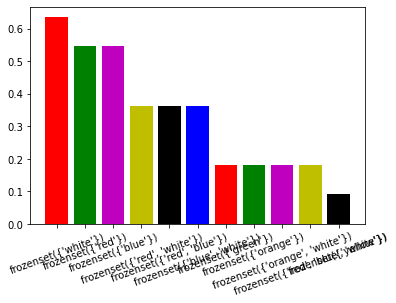

In [13]:
#plotting barplot for visualizatin of the data regarding their support.
plt.bar(x = list(range(0, 11)), height = phone1_a.support[0:11], color ='rgmykb');plt.xticks(list(range(0, 11)), phone1_a.itemsets[0:11], rotation=20)

In [14]:
#get the most frequent pair as per their lift by using association rule function.
rules = association_rules(phone1_a, metric = "lift", min_threshold = 1)
rules.head()
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(red),"(green, white)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
10,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
17,(white),"(orange, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
13,(white),"(red, green)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
14,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
8,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
16,(orange),"(red, white)",0.181818,0.363636,0.090909,0.500000,1.375000,0.024793,1.272727
15,"(red, white)",(orange),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909


In [15]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

In [17]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
8,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
14,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
4,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
